In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import sys
from ctapipe_io_lst import LSTEventSource
from lstchain.calib.camera.r0 import LSTR0Corrections

from traitlets.config.loader import Config 

plt.rcParams['font.size'] = 18

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# This is notebook to low level calibration R0->R1 
Fill the R1 container ```event.r1.tel[0].waveform```.

Following function exist:
1. to subtraction pedestal ```subtract_pedestal(event)```
2. to dt correction ```time_lapse_corr(event)```
3. to interpolate spikes ```interpolate_spikes(event)```

or you can call method ```calibrate(event)```, then baseline value will be around 0. This is the preferred way to do low level corrections.

To subtraction pedestal you need pedestal file from cta-lstchain-extra or you can create pedestal file yourself using scirpt ```create_pedestal_file.py```

In ```config``` you can set how many samples in waveform keep to R1 container (first three and last sample in waveform are noisy)  

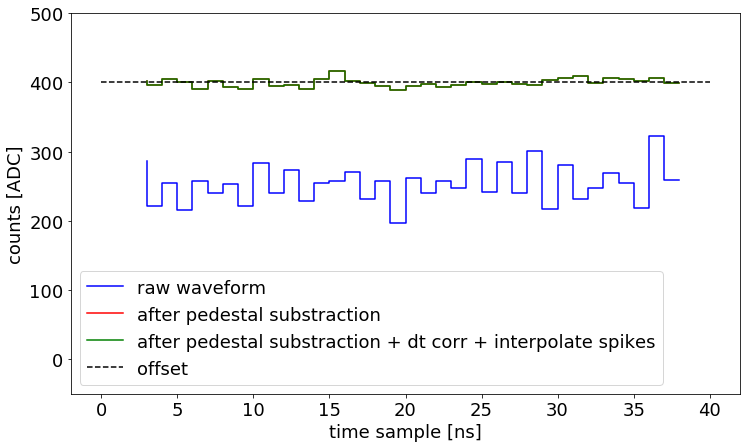

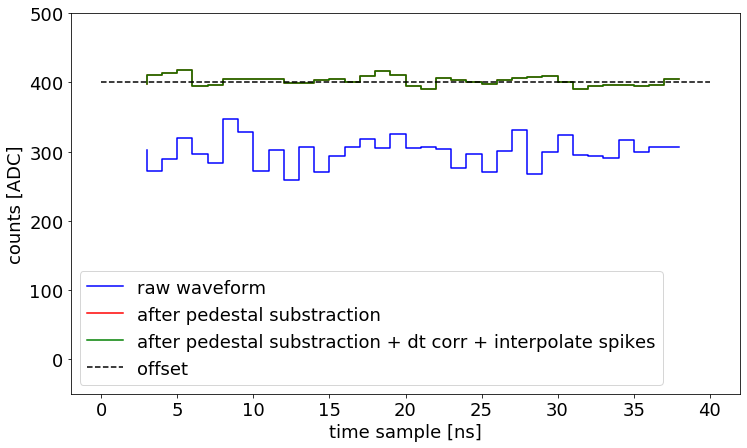

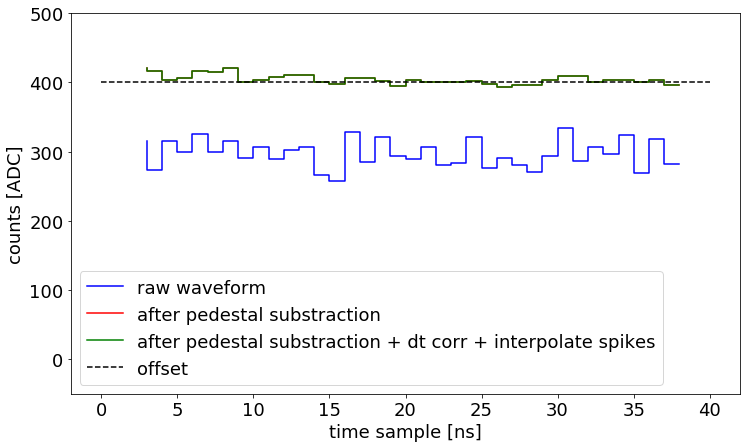

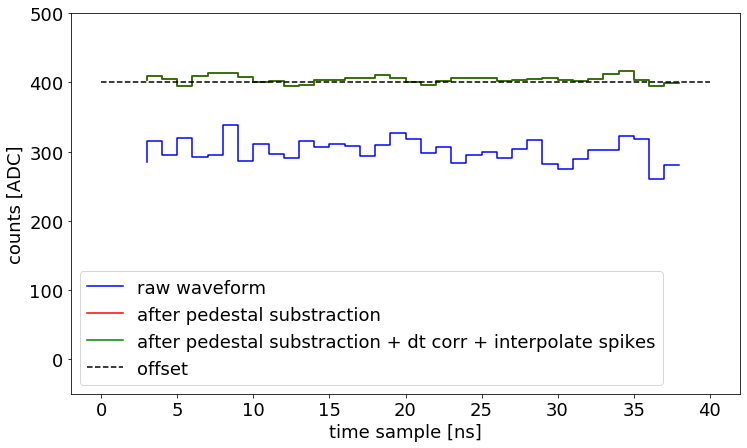

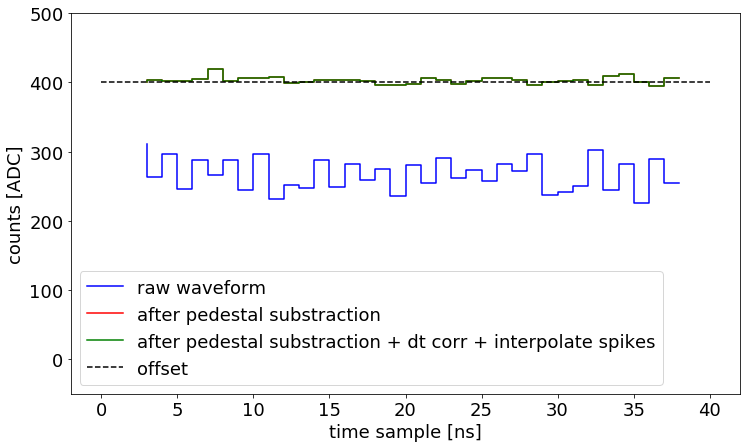

In [3]:
# Give path to real LST data
# We have to use LSTEventSource: LST-1.1.Run00xxx.xxx.fits.fz
# because for dt correction and interpolate spikes events must be in turn (event_id = 0,1,2, ...)
reader = LSTEventSource(input_url="/media/pawel1/ADATA HD330/20191122/LST-1.1.Run01599.0001.fits.fz",
                        max_events=5)

# Otherwise, you can give your own input file
#reader = LSTEventSource(input_url= )#Any .fits.fz you might have

offset_value = 400
# Give path to pedestal file and set offset to baseline
# Assuming that you are running the Notebook from ~/cta-lstchain/notebooks
tel_id = 1
config = Config({
    "LSTR0Corrections": {
        "pedestal_path": "../../calib_file//drs4_pedestal.Run1599.0000.fits",
        "offset":  offset_value,
        "tel_id": tel_id, 
        "r1_sample_start": None,
        "r1_sample_end": None
    }
})
# Give path to pedestal file
lst_r0 = LSTR0Corrections(config=config)

t = np.linspace(3, 38, 36)

for ev in reader:
    plt.figure(figsize=(12, 7))
    plt.step(t,  ev.r0.tel[tel_id].waveform[0, 7, 3:39], color="blue", label="raw waveform")
    
    lst_r0.subtract_pedestal(ev, tel_id=tel_id)
    
    plt.step(t,  ev.r1.tel[tel_id].waveform[0, 7, 3:39], color="red", label="after pedestal substraction ")
    
    lst_r0.time_lapse_corr(ev, tel_id=tel_id)
    lst_r0.interpolate_spikes(ev, tel_id=tel_id)
    
    plt.step(t,  ev.r1.tel[tel_id].waveform[0, 7, 3:39], color="green", label="after pedestal substraction + dt corr + interpolate spikes")
    plt.plot([0, 40], [offset_value, offset_value], 'k--', label="offset")
    plt.xlabel("time sample [ns]")
    plt.ylabel("counts [ADC]")
    plt.legend()
    plt.ylim([-50, 500])
    plt.show()

# Call ```calibrate``` method

This is the preferred way to do low level corrections.

53001


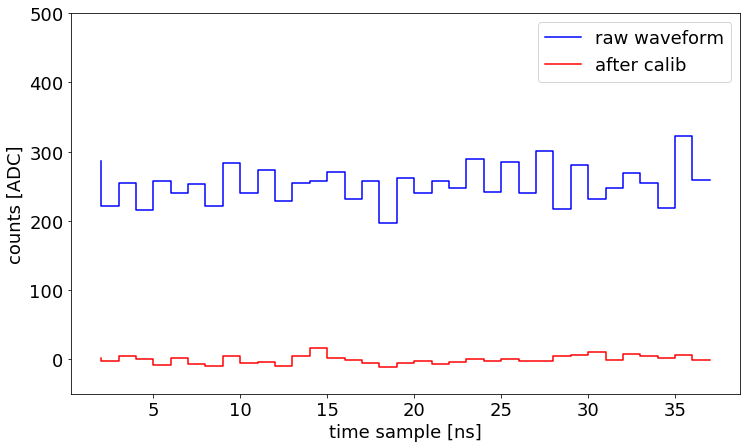

53002


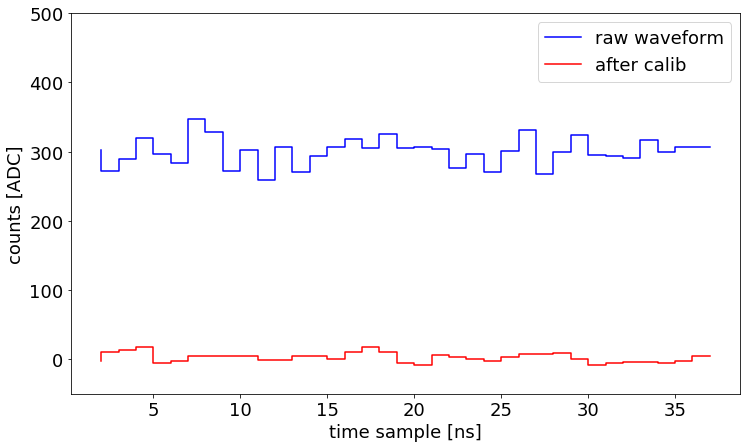

53003


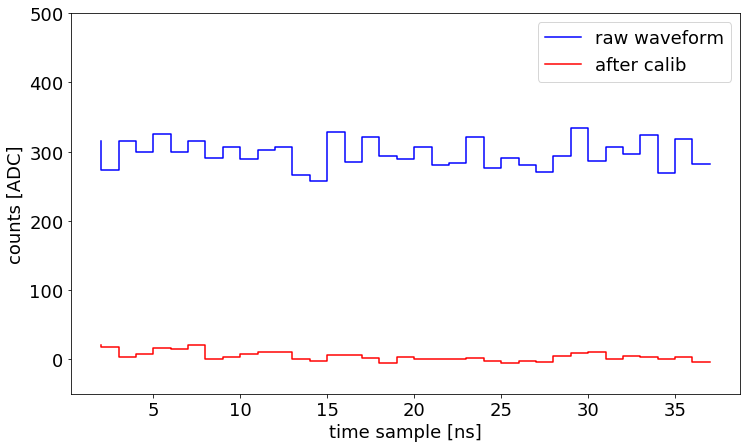

53004


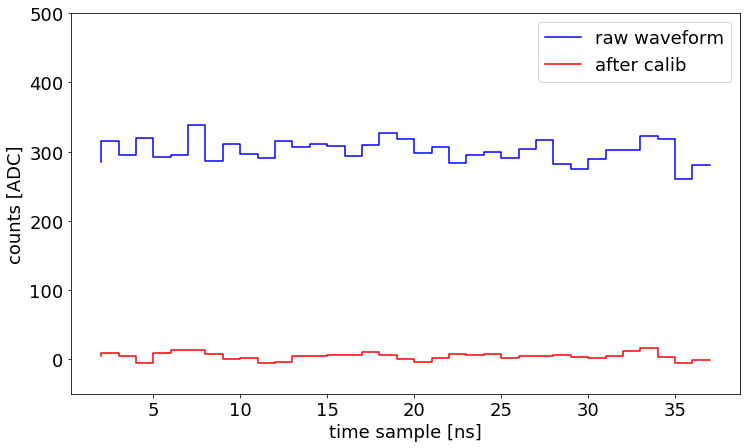

53005


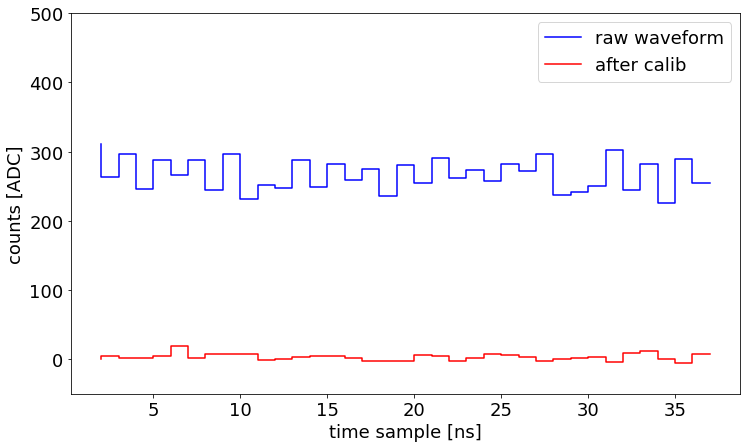

In [4]:
# Give path to real LST data
reader = LSTEventSource(
    input_url="/media/pawel1/ADATA HD330/20191122/LST-1.1.Run01599.0001.fits.fz",
    max_events=5)

# Again, you can give your own input file
#reader = LSTEventSource(input_url= )#Any .fits.fz you might have

tel_id = 1
# Give path to pedestal file 
config = Config({
    "LSTR0Corrections": {
        "pedestal_path": "../../calib_file//drs4_pedestal.Run1599.0000.fits",
    }
})

lst_r0 = LSTR0Corrections(config=config)

t = np.linspace(2, 37, 36)

for ev in reader:
    print(ev.r0.event_id)
    plt.figure(figsize=(12, 7))
    plt.step(t,  ev.r0.tel[tel_id].waveform[0, 7, 3:39], color="blue", label="raw waveform")
    
    lst_r0.calibrate(ev)

    plt.step(t,  ev.r1.tel[tel_id].waveform[0, 7, :], color="red", label="after calib")
    
    plt.xlabel("time sample [ns]")
    plt.ylabel("counts [ADC]")
    plt.legend()
    plt.ylim([-50, 500])
    plt.show()